# Mathematical Ecology

This notebook explores population models, equilibria, bifurcations, prey-predator models, functional responses and develops some tools to visualize them.

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Population models

We now develop a function to visualise population growth models

In [27]:
def plot_sys(v,x,t):
    for w in x:
        plot(t,v(w,t))
        xlabel('Time')
        ylabel('Population Growth')

The logistic growth model obeys the following differential equation.

$ \large{\frac{dN}{dT}= rN(1-\frac{N}{K})}$


where r is the growth rate and K is the carrying capacity

The closed form expression for N becomes

$\large{N(t_0)= \frac{k}{1+(\frac{k}{N_0} -1)e^{-rt}}}$

In [28]:
def logistic(x,t, k=10,r=0.06):
    return k/(1+((k/x) -1)*exp(-r*t))

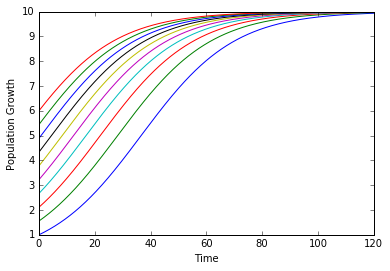

In [29]:
x = linspace(1,6, 10)
t= linspace(0,120,10000)
plot_sys(logistic,x,t)  

The Gompertz model is another population model where the grwoth rate is given by 

$\large{\frac{dN}{dT}= r_0 e^{\alpha t}N}$

$\large{N= N_0 e^{\frac{r}{\alpha}-\frac{r}{\alpha} e^{-\alpha t}} }$

In [30]:
def gompertz(x,t,r=1,a=1):
    return x*exp((r/a)-(r/a)*exp(-a*t))

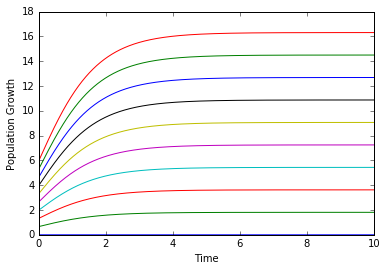

In [31]:
x = linspace(0,6, 10)
t= linspace(0,10,10000)
plot_sys(gompertz,x,t)  

### Equilibria

It would be helpful to have a tool to help visulaize equilibria. An equilibriwm occurs when
$\frac{dN}{dt}=0$

In [32]:
def plot_eq(v,x,param=[1,1]):

    plot(x,v(x,param))
    xlabel('Parameter')
    ylabel('Equilibrium')

The For Surplus Yield Model is given by 

$\large{\frac{dN}{dt}= \alpha N ln(\frac{K}{N})-qEN}$

The equilibiria are given by 
$\large{N^*=0}$

and
 
$\large{N^* = Ke^{-\frac{qE}{\alpha}}}$

In [33]:
def Foxz(x,param =[1,1]):
    return param[0]*exp(-x/param[1])

We want to plot N* as a function of qE (the fishing mortality)

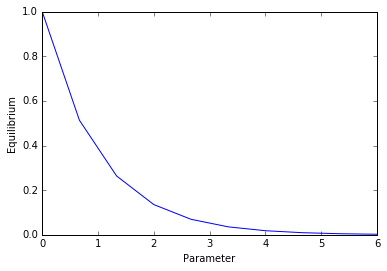

In [34]:
plot_eq(Foxz,x)

### Bifurcations

Equilibria are fascninating but the points at which they change their nature or bifurcate are fascinating as well. We explore bifurcations for the following differential equation.


$\large{\frac{dx}{dt}= \mu x+ x^3-x^5}$

On changing $\mu$, the equilibria change.

We need a function to plot bifurcations in general.

In [35]:
def plot_bif(v,xspace,param=[1,1]):
    for x in xspace:
        j= v(x)
        l= size(j)
        w = np.ones(l)
        plot(x*w,j,'ko')
        xlabel('Parameter')
        ylabel('Equilibrium')

And we need a function to plot this specific one.

In [36]:
def bif_1(x):
    if x <-0.25:
        return [0]
    elif x ==-0.25:
        return [0,np.sqrt(0.5), -np.sqrt(0.5)]
    elif x >0:
        return [0,np.sqrt(0.5 + 0.5*np.sqrt(1+4*x)), - np.sqrt(0.5 + 0.5*np.sqrt(1+4*x))]
    else:
        return [0,np.sqrt(0.5 + 0.5*np.sqrt(1+4*x)), - np.sqrt(0.5 + 0.5*np.sqrt(1+4*x)), np.sqrt(0.5 - 0.5*np.sqrt(1+4*x)), - np.sqrt(0.5 - 0.5*np.sqrt(1+4*x))]


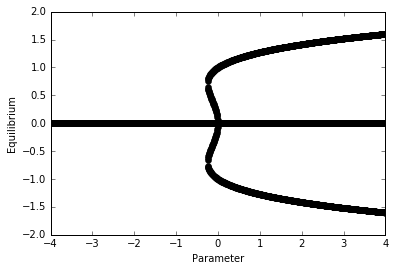

In [37]:
x = linspace(-4,4, 1000)
plot_bif(bif_1,x)

The  number of equilibria go from 1 to 3 to 5 to 3 to 2. Let's plot x when $\mu $ is 0.1. We need a function to time step odes.

In [38]:
def plot_steps(v,xspace,r,dt=0.005, limy = [-1,1]):
    for x_0 in xspace:
        t=zeros(r)
        x=np.zeros(r+1)
        x[0]= x_0
        for i in range(r):
            t[i]=i*dt
            x[i+1]=x[i]+dt*v(x[i])
        plot(t,x[:-1])
        ylim(limy)
    xlabel('t')
    ylabel('x(t)')

In [39]:
def bif_2(x):
    return -0.1*x+x**3-x**5

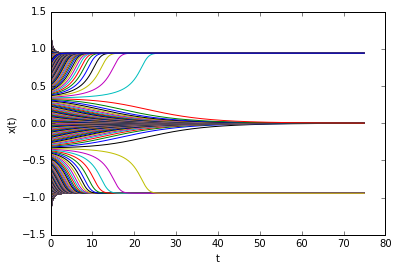

In [40]:
plot_steps(bif_2,arange(-2, 2, 0.01),1500,0.05, [-1.5,1.5])

We see 3 clear equilibria (stable) and 2 regions of divergence (unstable equilibria).

### Stable regimes

The Beverton-Holt recruitment curve is given by

$\large{N_{t+1}= \frac{R_0^\beta N_t}{[1+ ((R_0-1)/K) N_t]^\beta}}$

One of the equilibria is the carrying capacity K. For that equilibrium to be stable, we need 

$\large{| 1-\beta +\frac{\beta}{R_0}| <1}$

For a monotonic damping, we need

$\large{\beta\big(1-\frac{1}{R_0}\big) <1}$

For a oscillatory damping, we need

$\large{1<\beta\big(1-\frac{1}{R_0}\big) <2}$

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in double_scalars


<function matplotlib.pyplot.show>

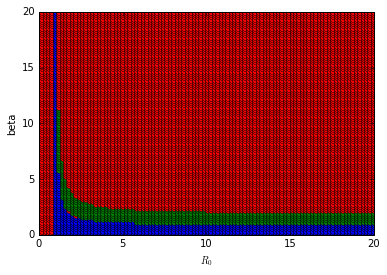

In [43]:
ra = np.linspace(0,20,100)
ba = np.linspace(0,20,100)
for re in ra:
    for be in ba:
        f = 1- be*(1-1/re)
        if 0<f <1:
            plt.plot(re,be,'bo')
        elif -1<f <0:
            plt.plot(re,be,'go')
            
        else:
                
            plt.plot(re,be,'ro')
xlabel('$R_0$')
ylabel('beta')
plt.show

Blue is the region of monotonic stability. Green is the region of oscillatory stability. Red is the completely unstable region.

### Prey Predator model with refugees.

If N represent the prey and P represent the predators, their interaction is given by 

$\large{\frac{dN}{dt}= rN-c(N-s)P}$

$\large{\frac{dP}{dt}= b(N-s)P- mP}$

Here, s of the predators are capable of taking refuge.

We use a quiver plot to see the dynamics of this phase space

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


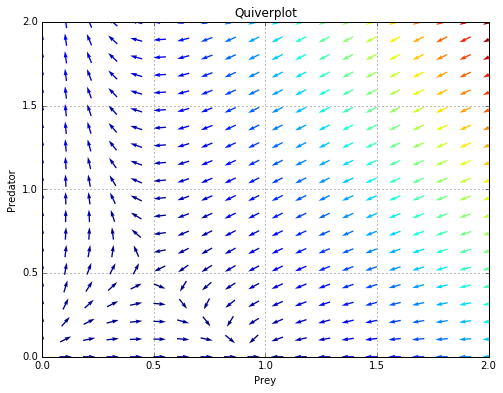

In [44]:
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []

#iv1, iv2 = initial values, dt = timestep, time = range
def Refuge(X, r=1,c=1,b=1,m=1,s=1):
    # here X[0] = x and x[1] = y    
    return np.array([ r*X[0] - c*(X[0]-s)*X[1] , b*(X[0]-s)*X[1] -m*X[1] ])
    
def Competition(X, r=1,c=1,b=1,m=1,s=1):
    # here X[0] = x and x[1] = y    
    return np.array([ r*X[0]*( 1- c*X[0]-s*X[1]) , r*X[1]*( 0.5- c*X[0]) ])

#plot
fig2 = plt.figure(figsize=(8,6))
ax4 = fig2.add_subplot(1,1,1)


ax4.set_title("Quiverplot")
ax4.set_xlabel("Prey")
ax4.set_ylabel("Predator")
ax4.legend(loc='best')

# quiverplot
# define a grid and compute direction at each point
x = np.linspace(0, 2, 20)
y = np.linspace(0, 2, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = Competition([X1, Y1])                        # compute growth rate on the grid
M = (np.hypot(DX1, DY1))                        # norm growth rate 
M[ M == 0] = 1.                                 # avoid zero division errors 
DX1 /= M                                        # normalize each arrows
DY1 /= M

ax4.quiver(X1, Y1, DX1, DY1, M, pivot='mid')
ax4.grid()

The equilibrium at (0.5,0.5) is a saddle. There are equilibrium where the predator goes extinct. There is also a regime where the population of the predator blows up while that of the prey shrinks

### Functional responses

A functional response in ecology is the intake rate of a consumer as a function of food density.

$\large{\frac{dN}{dt}= rN(1-\frac{N}{K})- f(N)P}$

Here, f(N) is the intake rate of prey by a single predator

Bifurcations arise as f(N) changes.

It is a good idea to plot the logistic term and the functional response term separately. The points of intersection would give the equilibria. So, a function to plot two plots is needed.

In [61]:
def mult_plot(v,f,x,ylims=[0,5]):
    plot(x,v(x),'r')
    pspace=linspace(0,1.5,7)
    for p in pspace:
        plot(x,f(x,p),'g')
        ylim(ylims)

The logistic term

In [52]:
def logistic2(x,r=2,K=8):
    return r*x*(1-x/K)

Linear f(N)

f(N)= cN

In [49]:
def linear(x,p,c=4,a=1):
    return (c*p*x)

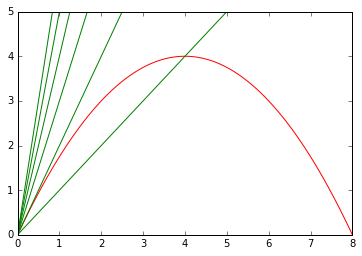

In [65]:
x = linspace(0,8, 100)
mult_plot(logistic2,linear,x)

The number of equilibria can be 1 or 2.

$\large{f(N)= \frac{cN}{a+N}}$

In [50]:
def funcresp2(x,p,c=4,a=1):
    return (c*p*x)/(a+x)

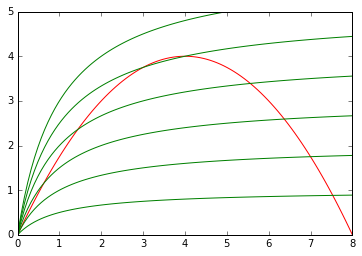

In [66]:
mult_plot(logistic2,funcresp2,x)

The number of equilibria can be 1,2 or 3

$\large{f(N)= \frac{cN^2}{a^2+N^2}}$

In [51]:
def funcresp3(x,p,c=4,a=1):
    return (c*p*x**2)/(a+x**2)

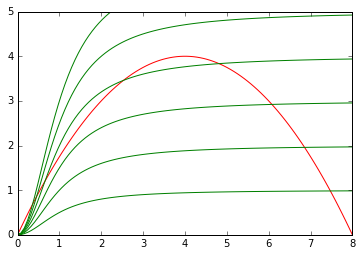

In [67]:
mult_plot(logistic2,funcresp3,x)

The number of equilibria can be 2,3 or 4